<a href="https://colab.research.google.com/github/anupammaiti10/Brain_Tumor_Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Classification**

In [1]:
# because Colab runs in a cloud environment, not on your local machine.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install imutils opencv-python

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.3 MB/s eta 0:00:00
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25868 sha256=4ca1827136d7e63e9ee786e5caddb2053ae3d1da2458377f9ec06ee8968ad677
  Stored in directory: /root/.cache/pip/wheels/31/d0/2c/87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [4]:
# Load the images directories
path = "/content/drive/My Drive/Colab_Notebooks/Brain_Tumor_Set"
if not os.path.exists(path):
  print("No such file path directory is present")
else:
  images_paths=list(paths.list_images(path))
found = any("Tumor (110).jpg" in p for p in images_paths)
print("Found!" if found else "Not found!")
# import tensorflow as tf
# dataset_path= "/content/drive/My Drive/Colab_Notebooks/Brain_Tumor_Set"

Found!


In [5]:
# Load training and validation sets
# batch_size=32

# train_ds=tf.keras.utils.image_dataset_from_directory(
#     dataset_path,
#     labels="inferred",
#     label_mode="categorical",
#     validation_split=0.2,
#     subset="training",
#     image_size=(224,224),
#     # batch_size=batch_size,
#     seed=123
# )
# val_ds = tf.keras.utils.image_dataset_from_directory(
#     dataset_path,
#     labels="inferred",
#     label_mode="categorical",
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(224,224),
#     # batch_size=batch_size
# )

In [6]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
# class_names = train_ds.class_names

In [8]:
# View One Batch of Images & Labels
# for images,labels in train_ds.take(1):
#   print(images.shape)
#   print(labels.shape)
#   print(labels.numpy())

In [9]:
# train_ds.take(1)

In [10]:
# Display Sample Images
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         # plt.title(class_names[labels[i]])
#         plt.axis("off")

In [11]:
# image_list=[]
# label_list=[]
# for images,labels in train_ds:
#   image_list.append(images)
#   label_list.append(labels)

# X = np.concatenate(image_list)
# y = np.concatenate(label_list)

In [12]:
# image_list
# X

In [13]:
# label_list
# images

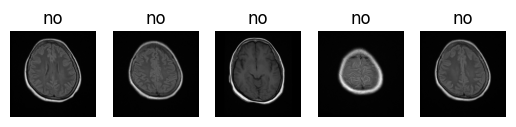

In [14]:
# Load and Display Sample Images
for image_path in range(len(images_paths[:5])):
  image=cv2.imread(images_paths[image_path])
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.subplot(1,5,image_path+1)
  plt.axis("off")
  plt.imshow(image)
  plt.title(images_paths[image_path].split("/")[-2])
plt.show()

In [15]:
IMAGE_SIZE=(224,224)
images=[]
labels=[]
count=0
for image_path in images_paths:
  image=cv2.imread(image_path)
  #convert the bggr to rgb color
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  #resize the image size to specified
  image=cv2.resize(image,IMAGE_SIZE)
  # image=image/255.0
  label=image_path.split("/")[-2]
  # label=1 if label=="yes" else 0
  count+=1
  print(count)
  images.append(image)
  labels.append(label)

Streaming output truncated to the last 5000 lines.
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442

In [16]:
# we are slicing only the first image, but it retains the batch dimension
images[0].shape

(224, 224, 3)

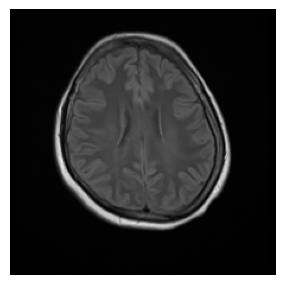

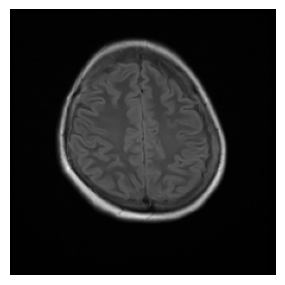

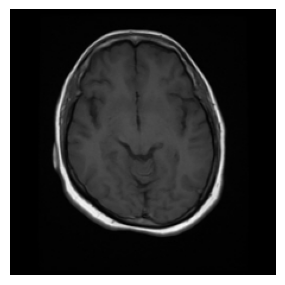

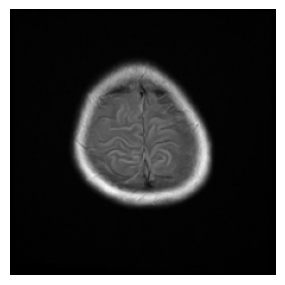

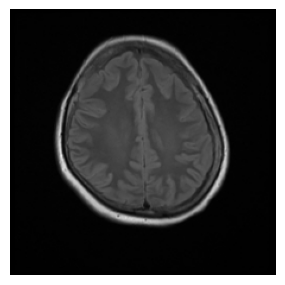

In [17]:
def image_show(index,image):
  plt.figure(figsize=(20,20))
  plt.subplot(5,1,index+1)
  plt.axis("off")
  plt.imshow(image)

for i in range(len(images[:5])):
  image_show(i,images[i])
plt.show()

In [18]:
labels[:10]

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']

In [19]:
#Normalize the image to specified range
images=np.array(images)/255.0
labels=np.array(labels)
# images
labels

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype='<U3')

In [20]:
pip install scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [21]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [22]:
# #Convert the categorical data into the class label
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [23]:
labels=to_categorical(labels)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [24]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(images,labels,test_size=0.2,random_state=42 )

In [25]:
# ImageDataGenerator which is used for data augmentation
# Data Augmentation is extremely helpful in cases where the input data is very less.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_images=ImageDataGenerator(fill_mode="nearest",rotation_range=15)

In [26]:
from tensorflow.keras.layers import Input ,Dense,AveragePooling2D,Dropout,Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import tensorflow as tf

In [27]:
# !pip install --upgrade keras

In [28]:
# Load Pre-Trained VGG16 Model (Feature Extractor)
# base_model=VGG16(weights="imagenet",input_tensor = tf.keras.Input(shape=(224, 224, 3)),include_top=False) # this code shows error
# Load pre-trained VGG16 without top layers
base_model=VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
base_input=base_model.input
# Extracts the feature maps learned by VGG16 after all convolutional and pooling layers.
base_output=base_model.output
# Applies average pooling to reduce the spatial dimensions of the feature maps.
base_output=AveragePooling2D(pool_size=(4,4))(base_output)
# Converts the 2D feature maps into a 1D vector (which is required for Dense layers).
base_output=Flatten(name="flatten")(base_output)
#Adds a Dense (fully connected) layer with 64 neurons.
base_output=Dense(64,activation="relu")(base_output)
base_output=Dropout(0.5)(base_output)
# Uses Softmax activation to convert outputs into probabilities.
base_output=Dense(2,activation="softmax")(base_output)

In [30]:
# Freeze the layers of our model
for layer in base_model.layers:
  layer.trainable=False

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [32]:
# connects the VGG16 feature extractor with our custom classification layers.
final_model=Model(inputs=base_input,outputs=base_output)
final_model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1, 512)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,747,650 (56.26 MB)

 Trainable params: 32,962 (128.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
batch_size=128
steps_per_epoch = len(images) // batch_size
validation_steps = len(labels) // batch_size

In [35]:
history =final_model.fit(
    train_images.flow(images, labels, batch_size=batch_size),
    steps_per_epoch= steps_per_epoch ,
    validation_data=(testX, testY),
    validation_steps=validation_steps,
    epochs=10
)

%time

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1749s 31s/step - accuracy: 0.6190 - loss: 0.6690 - val_accuracy: 0.8270 - val_loss: 0.4474
Epoch 2/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 22:59 25s/step - accuracy: 0.7656 - loss: 0.5033

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.7656 - loss: 0.5033 - val_accuracy: 0.8277 - val_loss: 0.4444
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1742s 31s/step - accuracy: 0.8213 - loss: 0.4410 - val_accuracy: 0.8773 - val_loss: 0.3388
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 348s 6s/step - accuracy: 0.8672 - loss: 0.3471 - val_accuracy: 0.8801 - val_loss: 0.3348
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1742s 31s/step - accuracy: 0.8799 - loss: 0.3377 - val_accuracy: 0.9118 - val_loss: 0.2739
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 348s 6s/step - accuracy: 0.9141 - loss: 0.2931 - val_accuracy: 0.9118 - val_loss: 0.2737
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1740s 31s/step - accuracy: 0.9035 - loss: 0.2812 - val_accuracy: 0.9276 - val_loss: 0.2348
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.8984 - loss: 0.3242 - val_accuracy: 0.9283 - val_loss: 0.2345
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1740s 31s/step - accuracy: 0.9153 - loss: 0.2562 - val_accuracy: 0.9318 - val_

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
predictions = final_model.predict(testX, batch_size=batch_size)
# Converting Probabilities to Class Labels
predictions = np.argmax(predictions, axis=1)
actuals = np.argmax(testY, axis=1)

# Convert label_binarizer.classes_ to a list of strings
target_names = [str(cls) for cls in label_binarizer.classes_]
# Prints classcification matrics
print(classification_report(actuals, predictions, target_names=target_names))

cm = confusion_matrix(actuals, predictions)
print(cm)

12/12 ━━━━━━━━━━━━━━━━━━━━ 285s 24s/step
              precision    recall  f1-score   support

          no       0.90      0.98      0.94       804
         yes       0.97      0.87      0.91       647

    accuracy                           0.93      1451
   macro avg       0.93      0.92      0.93      1451
weighted avg       0.93      0.93      0.93      1451

[[785  19]
 [ 86 561]]


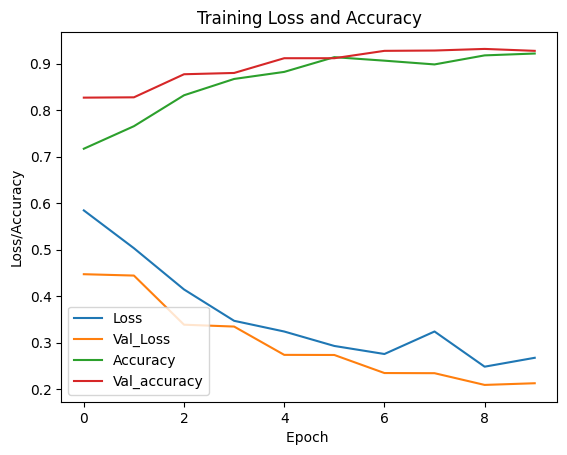

In [37]:
N=10
plt.plot(np.arange(0,N),actuals.history["loss"],label="Loss")
plt.plot(np.arange(0,N),actuals.history["val_loss"],label="Val_Loss")
plt.plot(np.arange(0,N),actuals.history["accuracy"],label="Accuracy")
plt.plot(np.arange(0,N),actuals.history["val_accuracy"],label="Val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()